In [1]:
!pip install advertools

In [2]:
%matplotlib inline

import os
import utils
import re
import nltk
import json
import gensim
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from utils import metrics
import advertools as adv
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from typing import List, Callable, Dict
# from googletrans import Translator
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from  utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import sys

random_state=2022

In [3]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')  

1
1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path='/content/drive/MyDrive/NLP/'

In [6]:
df=pd.read_csv(path + '2.csv')

In [7]:
df

,Unnamed: 0,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1,0,10,1,0,0,0,0,0,0
1,1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1,0,14,0,0,0,1,0,0,0
2,2,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,1,17,0,0,0,0,0,1,0
3,3,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,1,20,1,0,0,0,0,0,0
4,4,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,1,18,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,1,17,0,0,0,0,1,0,0
41737,41737,41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,1,14,0,0,1,0,0,0,0
41738,41738,41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,1,12,1,0,0,0,0,0,0
41739,41739,41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,1,13,0,0,1,0,0,0,0


In [8]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [9]:
data=df.astype(str)

In [10]:
type(data['caption'])

pandas.core.series.Series

In [11]:
def sentiment_analysis(caption):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    #Create a function to get the polarity
    def getPolarity(caption):
        return TextBlob(caption).sentiment.polarity
  
    #Create two new columns 'Subjectivity' & 'Polarity'
    data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
    data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)
    return data

sentiment_analysis(data['caption'])

,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun,TextBlob_Subjectivity,TextBlob_Polarity
0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1,0,10,1,0,0,0,0,0,0,0.632390,0.282576
1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1,0,14,0,0,0,1,0,0,0,0.405556,0.168056
2,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,1,17,0,0,0,0,0,1,0,0.000000,0.000000
3,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,1,20,1,0,0,0,0,0,0,0.333333,0.250000
4,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,1,18,0,0,1,0,0,0,0,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,1,17,0,0,0,0,1,0,0,0.506629,0.428030
41737,41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,1,14,0,0,1,0,0,0,0,0.416667,0.491667
41738,41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,1,12,1,0,0,0,0,0,0,0.510417,0.260417
41739,41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,1,13,0,0,1,0,0,0,0,0.708333,0.445833


In [12]:
hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()
hashtag_summary['top_hashtags'][:10]

[('#london', 2955),
 ('#plasticsurgery', 2074),
 ('#cosmeticsurgery', 1635),
 ('#edinburgh', 1334),
 ('#plasticsurgeon', 1179),
 ('#beforeandafter', 1019),
 ('#skincare', 950),
 ('#beauty', 947),
 ('#breastaugmentation', 946),
 ('#aesthetics', 921)]

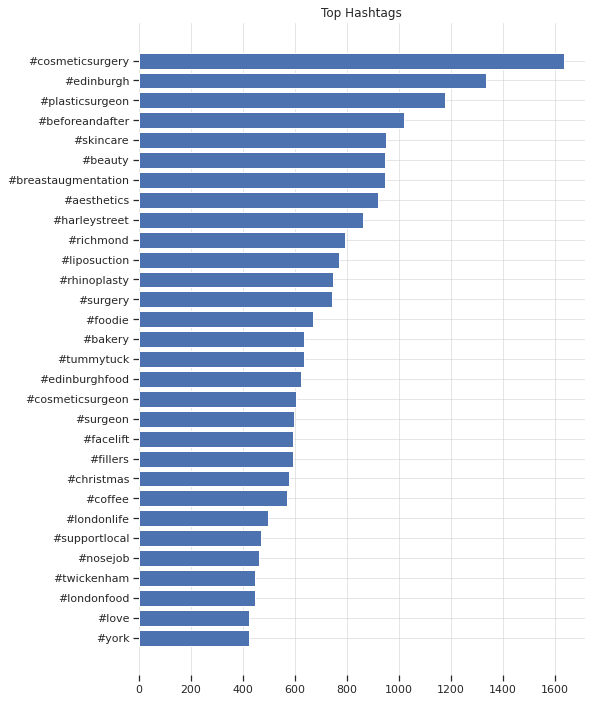

In [13]:
plt.figure(facecolor='white', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [14]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()
emoji_summary['top_emoji'][:10]

[('✨', 3657),
 ('📸', 2149),
 ('❤️', 1838),
 ('😍', 1753),
 ('🎄', 1189),
 ('⭐', 1176),
 ('\U0001f90d', 1161),
 ('📞', 1029),
 ('☎️', 959),
 ('📍', 952)]

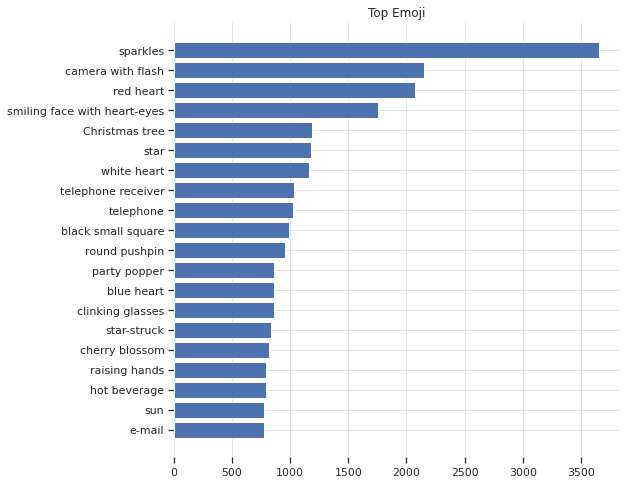

In [15]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [16]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()
mentions=mention_summary['top_mentions'][:10]

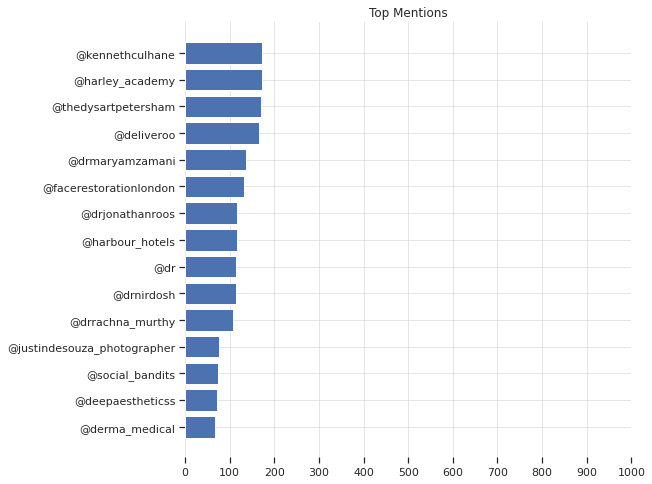

In [17]:
plt.figure(facecolor='white', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [18]:
extracted =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
        emoji=emoji_summary['emoji'],
        emoji_text=emoji_summary['emoji_text'],
        emoji_count=emoji_summary['emoji_counts'] 
         ))


extracted.head(5)

,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1,0,10,1,...,0,0.632390,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1,0,14,0,...,0,0.405556,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
2,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,1,17,0,...,0,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
3,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,1,20,1,...,0,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
4,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,1,18,0,...,0,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0


In [19]:
def captionLength(i):
    return len(i)

caption_length = extracted['caption'].apply(captionLength)
extracted['caption_length'] = caption_length

In [20]:
#Converting the columns into the float datatype
a=['followers']
for i in a:
  extracted[i]= extracted[i].astype(str).astype(float)
extracted

,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,...,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length
0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1,0,10,1,...,0.632390,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10,860
1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1,0,14,0,...,0.405556,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2,716
2,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,1,17,0,...,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0,425
3,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,1,20,1,...,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0,490
4,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,1,18,0,...,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,1,17,0,...,0.506629,0.428030,"[#lookingforward, #theatreland, #performingart...",6,"[@evening, @tiktok, @nationalyouththeatre, @ra...",4,[],[],0,878
41737,41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,1,14,0,...,0.416667,0.491667,"[#lookingforward, #travelinspiration, #lovetra...",7,[@youmustgoblog],1,[🍾],[bottle with popping cork],1,532
41738,41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,1,12,1,...,0.510417,0.260417,"[#lookingforward, #londonviews, #prettycitylon...",8,[@damienhewetson],1,[],[],0,479
41739,41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,1,13,0,...,0.708333,0.445833,"[#lookingforward, #travelinspo, #datenight, #b...",7,[],0,[],[],0,643


In [21]:
word_freq_hash = adv.word_frequency(extracted['hashtags'].str.join(' '), extracted['followers'].fillna(0))
word_freq_hash.head()
# type(word_freq_hash.word)

d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
print(d.get('#chelseabridgeclinic'))
print(d.get('#london'))
print(d.get('#test'))


def countHashtags(tags):
      if len(tags)==0:
        return 0
      sum = 0
      for i in tags:
        sum += (d.get(i))
      return sum/len(tags)

hashtag_average = extracted['hashtags'].apply(countHashtags)
extracted['hashtag_popularity'] = hashtag_average

1093.0
18021.0
1093.0


In [22]:
extracted

,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,...,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length,hashtag_popularity
0,0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1,0,10,1,...,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10,860,3219.750000
1,1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1,0,14,0,...,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2,716,5178.333333
2,2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,0,1,17,0,...,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0,425,17663.680000
3,3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,0,1,20,1,...,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0,490,16841.857143
4,4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,0,1,18,0,...,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,0,1,17,0,...,0.428030,"[#lookingforward, #theatreland, #performingart...",6,"[@evening, @tiktok, @nationalyouththeatre, @ra...",4,[],[],0,878,153640.333333
41737,41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,0,1,14,0,...,0.491667,"[#lookingforward, #travelinspiration, #lovetra...",7,[@youmustgoblog],1,[🍾],[bottle with popping cork],1,532,81714.428571
41738,41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,0,1,12,1,...,0.260417,"[#lookingforward, #londonviews, #prettycitylon...",8,[@damienhewetson],1,[],[],0,479,102699.125000
41739,41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,0,1,13,0,...,0.445833,"[#lookingforward, #travelinspo, #datenight, #b...",7,[],0,[],[],0,643,70165.571429


In [23]:
import time
# Config

REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def remove_brackets_from_list(text:str)->str:
    """
    Remove the [] brackets from the each of the list
    """
    return text

def translation(text: str) -> str:
  
    """
    Replaces any non english words to the english language
    """
    translator = Translator()
    res=translator.translate(text, dest='en')
    return res.text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)


In [24]:
PREPROCESSING_PIPELINE = [
                          clean_mention,
                          clean_hashtags,
                          # translation
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]

# Anchor method

def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1
    return reduce(lambda txt, f: f(txt), filter_methods, text)

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')
print('[Debug] Before:\n{}'.format(extracted.caption[:10]))

L=['hashtags','emoji_text','mentions']
# L=['hashtags','mentions']
A=['caption']

# Replace each sentence with its pre-processed version
extracted['caption'] = extracted['caption'].apply(lambda txt: text_prepare(txt))

for i in L:
  extracted[i]=extracted[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

print('[Debug] After:\n{}'.format(extracted.caption[:10]))
print()

print("Pre-processing completed!")

Pre-processing text...
[Debug] Before:
0    𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...
1    𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...
2    Hand dived Isle of Jura scallop, smoked roe, l...
3    Jerusalem Artichoke prepared as your first des...
4    Main course from our seasonal 7 course menu: B...
5    North Sea Halibut with sea vegetables and Roya...
6    Adding the final touches before welcoming our ...
7    Congratulations to our Chef de Rang’s Dani, An...
8    Gift your Valentine a future visit to Number O...
9    We are looking forward to a great weekend in E...
Name: caption, dtype: object
[Debug] After:
0    possible thanks lateral flow testing fast simp...
1    grateful kind words feedback receiving since s...
2    hand dived isle jura scallop smoked roe leek c...
3    jerusalem artichoke prepared first dessert mal...
4    main course seasonal 7 course menu borders roe...
5    north sea halibut sea vegetables royal beluski...
6    adding final touches welcoming g

In [25]:
extracted.to_csv(path + '3.csv')

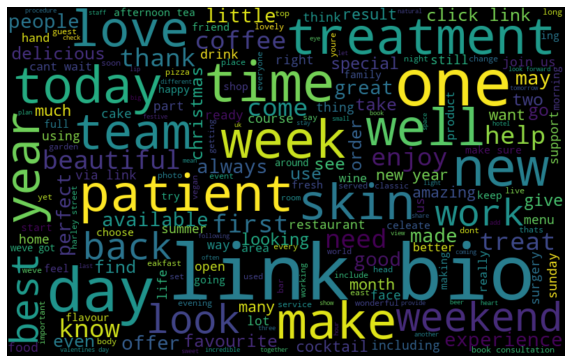

In [26]:
#Understanding the common words used in the captions: WordCloud

all_words = ' '.join([text for text in extracted['caption']]) 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

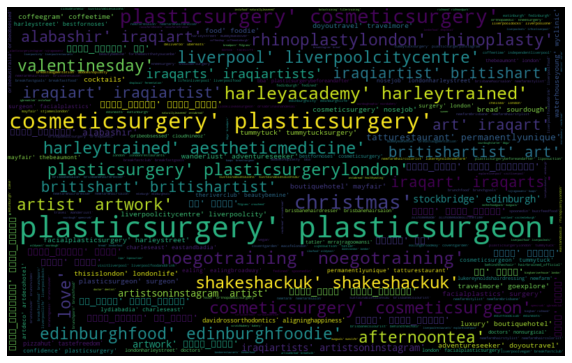

In [27]:
# Understanding the common words used in the hashtags: WordCloud

normal_words =' '.join([text for text in extracted['hashtags']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

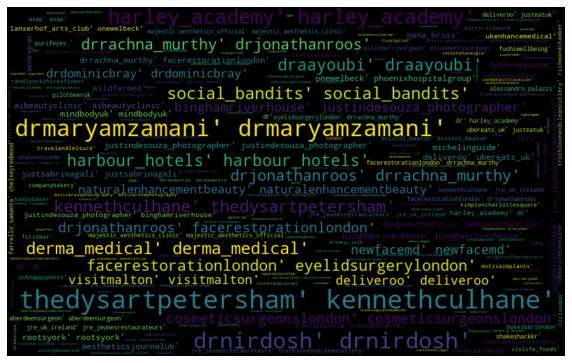

In [28]:
# Understanding the common words used in the mentions: WordCloud

normal_words =' '.join([text for text in extracted['mentions']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
bow_caption=Feature_Extraction(extracted['caption'],4,CountVectorizer)
bow_caption
print("\n\n\n")
bow_hashtags=Feature_Extraction(extracted['hashtags'],0,CountVectorizer)
bow_hashtags
print("\n\n\n")
bow_emoji_text=Feature_Extraction(extracted['emoji_text'],0,CountVectorizer)
bow_emoji_text
print("\n\n\n")
bow_mentions=Feature_Extraction(extracted['mentions'],0,CountVectorizer)
bow_mentions
print("\n\n\n")
bow_dataset = pd.DataFrame(np.hstack((bow_caption,bow_hashtags,bow_emoji_text,bow_mentions,extracted)))
bow_dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


always amazing available beautiful chocolate christmas coffee consultation delicious enjoy every experience favourite first friday great happy little london looking lovely online order patient patients people perfect please procedure results share special start sunday surgery thank today treatment visit website weekend would years youre






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abdominoplasty aesthetic aestheticmedicine aesthetics antiageing antiaging bakery beauty beforeandafter blepharoplasty botox boutiquehotel bread breakfast breastaugmentation breastimplants breastlift breastreduction breastsurgeon breastsurgery brunch cake christmas cocktails coffee coffeeshop confidence cosmetic cosmeticsurgeon cosmeticsurgery delicious dermalfiller dermalfillers dessert doctor edinburgh edinburghfood edinburghfoodie edinburghlife facelift fillers finedining food foodie foodphotography foodporn harleystreet hotel injectables instafood instagood juvederm lipfiller lipfillers lipo liposuction london londonfood londonhotel londonlife londonplasticsurgeon love lunch luxury luxuryhotel mayfair michelin mommymakeover nonsurgical nosejob pastry plasticsurgeon plasticsurgery plasticsurgerylondon restaurant rhinoplasty rhinoplastylondon richmond richmonduponthames scotland shoplocal skincare sourdough staycation supportlocal surgeon surgery surrey teddington transformation trav

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


and arrow backhand beer beverage black blossom blue button camera check cherry christmas clapping clinking cocktail collision diamond dizzy down drooling exclamation eyes face fire flag flash folded food fork glass glasses globe glowing green grinning hamburger hand hands health heart hearts hot in index keycap kingdom kiss knife laptop leaf left light mail man mark medium mobile of ok orange party partying person phone pizza pointing popper pushpin raising receiver red registered right round savoring showing skin small smiling sparkles square star struck sun syringe telephone thumbs tone tree two united up white wine winking with woman worker yellow




108marylebonelane 40ftbrewery aberdeensurgeon aestheticsjournaluk aibeautyclinic alessandro_palazzi ameliaclaudia asap barchrichmond binghamriverhouse blackswan_oldstead bristol_beacon cazcabeltequila chelseyredwood ciaralawless1 cosmeticsurgeonslondon curiocollection deepaestheticss deliveroo derma_medical dr draayoubi drdominicbray d

,0,1,2,3,4,5,6,7,8,9,...,361,362,363,364,365,366,367,368,369,370
0,0,0,0,0,0,0,0,0,0,0,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,0,0,0,0,0,0,0,0,0,0,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]","'clapping hands', 'orange heart'",2,716,5178.333333
2,0,0,0,0,0,0,0,0,0,0,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,425,17663.68
3,0,0,0,0,0,0,0,0,0,0,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,490,16841.857143
4,0,0,0,0,0,0,0,0,0,0,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],,0,878,153640.333333
41737,0,0,0,1,0,0,0,0,0,0,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,[🍾],'bottle with popping cork',1,532,81714.428571
41738,0,0,0,0,0,0,0,0,0,1,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],,0,479,102699.125
41739,0,0,0,1,0,0,0,0,0,0,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,,0,[],,0,643,70165.571429


In [30]:
print(len(bow_dataset.columns))
a=len(bow_dataset.columns)-25+1
print(a)
bow_dataset[len(bow_dataset.columns)-28+1]
bow_dataset.rename(columns = {a:'likes'}, inplace = True)
df=removeColumnContainString(bow_dataset)

371
347
Couldn't covert 345 to float
Couldn't covert 362 to float
Couldn't covert 364 to float
Couldn't covert 366 to float
Couldn't covert 367 to float


In [31]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [32]:
dropped = [8,11,14,28,31,32,33,34,51,52,54,55,56]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,9,10,...,357,358,359,360,361,363,365,368,369,370
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.192308,0.390632,0.005571
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.038462,0.325148,0.008959
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.000000,0.192815,0.030561
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.000000,0.222374,0.029139
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.000000,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.000000,0.398818,0.265825
41737,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.019231,0.241473,0.141381
41738,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.000000,0.217372,0.177688
41739,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.000000,0.291951,0.121399


In [33]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [34]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.2, random_state=random_state)

## XGBoost

In [35]:
# hyperparameterTuning_XGBoost(x_train_bow,y_train_bow)

In [36]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(x_train_bow, y_train_bow)
y_pred_bow_xgboost = xg_reg.predict(x_test_bow)

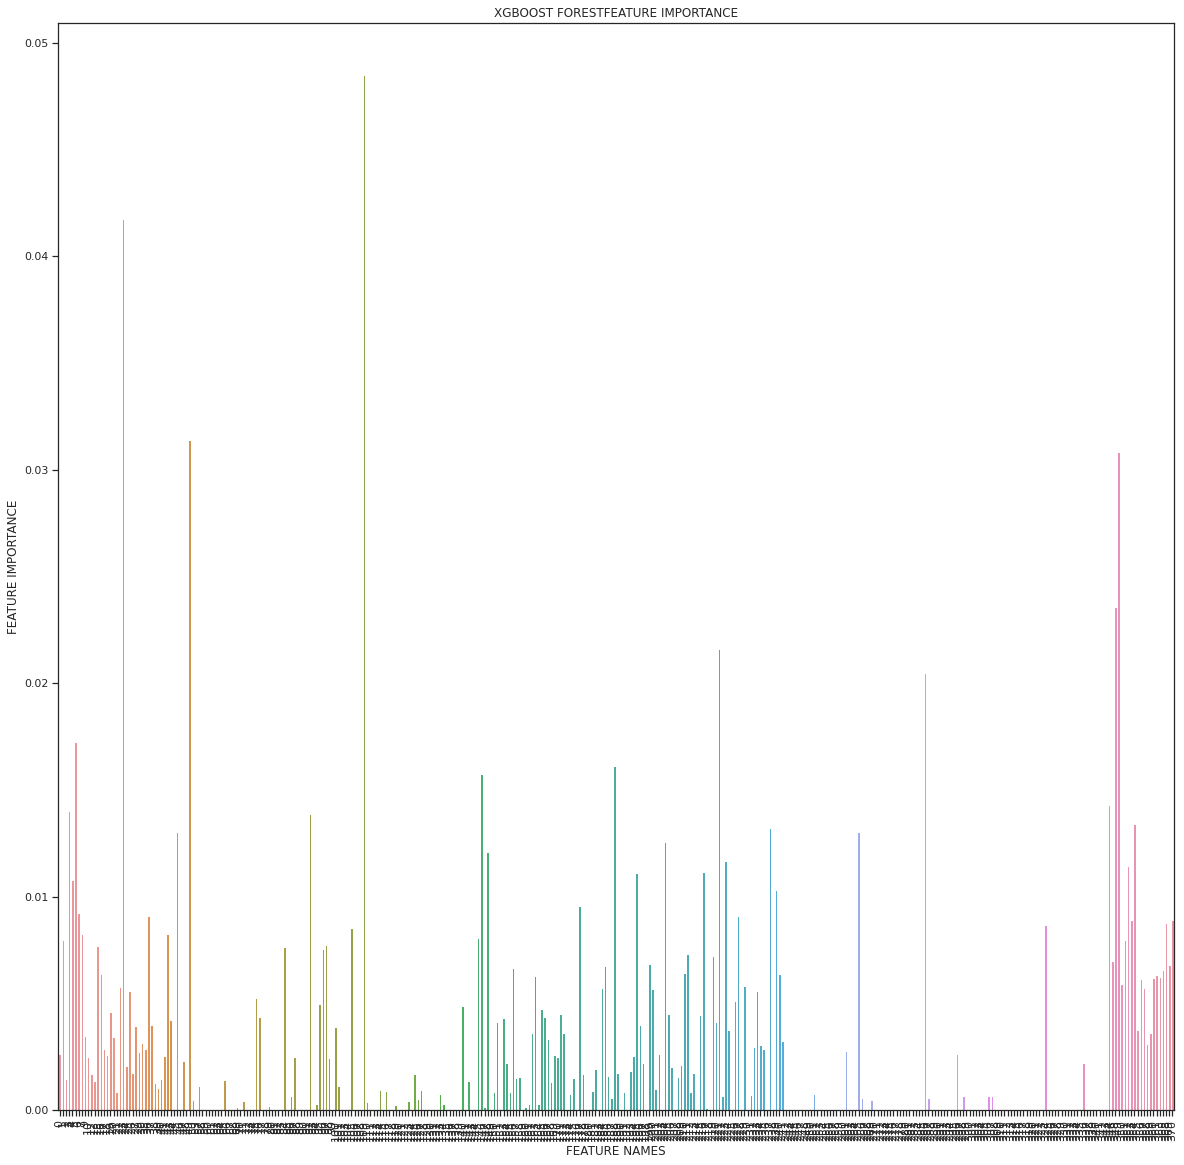

In [37]:
plot_feature_importance(xg_reg.feature_importances_,x_train_bow.columns,'XGBOOST FOREST')

In [58]:
a=featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00264
Feature: 1, Score: 0.00799
Feature: 2, Score: 0.00149
Feature: 3, Score: 0.01404
Feature: 4, Score: 0.01081
Feature: 5, Score: 0.01727
Feature: 6, Score: 0.00924
Feature: 7, Score: 0.00827
Feature: 8, Score: 0.00347
Feature: 9, Score: 0.00251
Feature: 10, Score: 0.00172
Feature: 11, Score: 0.00137
Feature: 12, Score: 0.00771
Feature: 13, Score: 0.00639
Feature: 14, Score: 0.00287
Feature: 15, Score: 0.00261
Feature: 16, Score: 0.00463
Feature: 17, Score: 0.00344
Feature: 18, Score: 0.00087
Feature: 19, Score: 0.00578
Feature: 20, Score: 0.04174
Feature: 21, Score: 0.00206
Feature: 22, Score: 0.00560
Feature: 23, Score: 0.00174
Feature: 24, Score: 0.00394
Feature: 25, Score: 0.00274
Feature: 26, Score: 0.00314
Feature: 27, Score: 0.00288
Feature: 28, Score: 0.00908
Feature: 29, Score: 0.00402
Feature: 30, Score: 0.00128
Feature: 31, Score: 0.00103
Feature: 32, Score: 0.00146
Feature: 33, Score: 0.00252
Feature: 34, Score: 0.00827
Feature: 35, Score: 0.00422
Fe

In [64]:
# from utils import metrics 
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_bow,y_pred_bow_xgboost)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

RMSE: 0.029661

R2 Score: 0.488104

MAE : 0.008726

MSE : 0.000880

RMSLE : -3.517921

max_error : 0.684508



## Random Forest

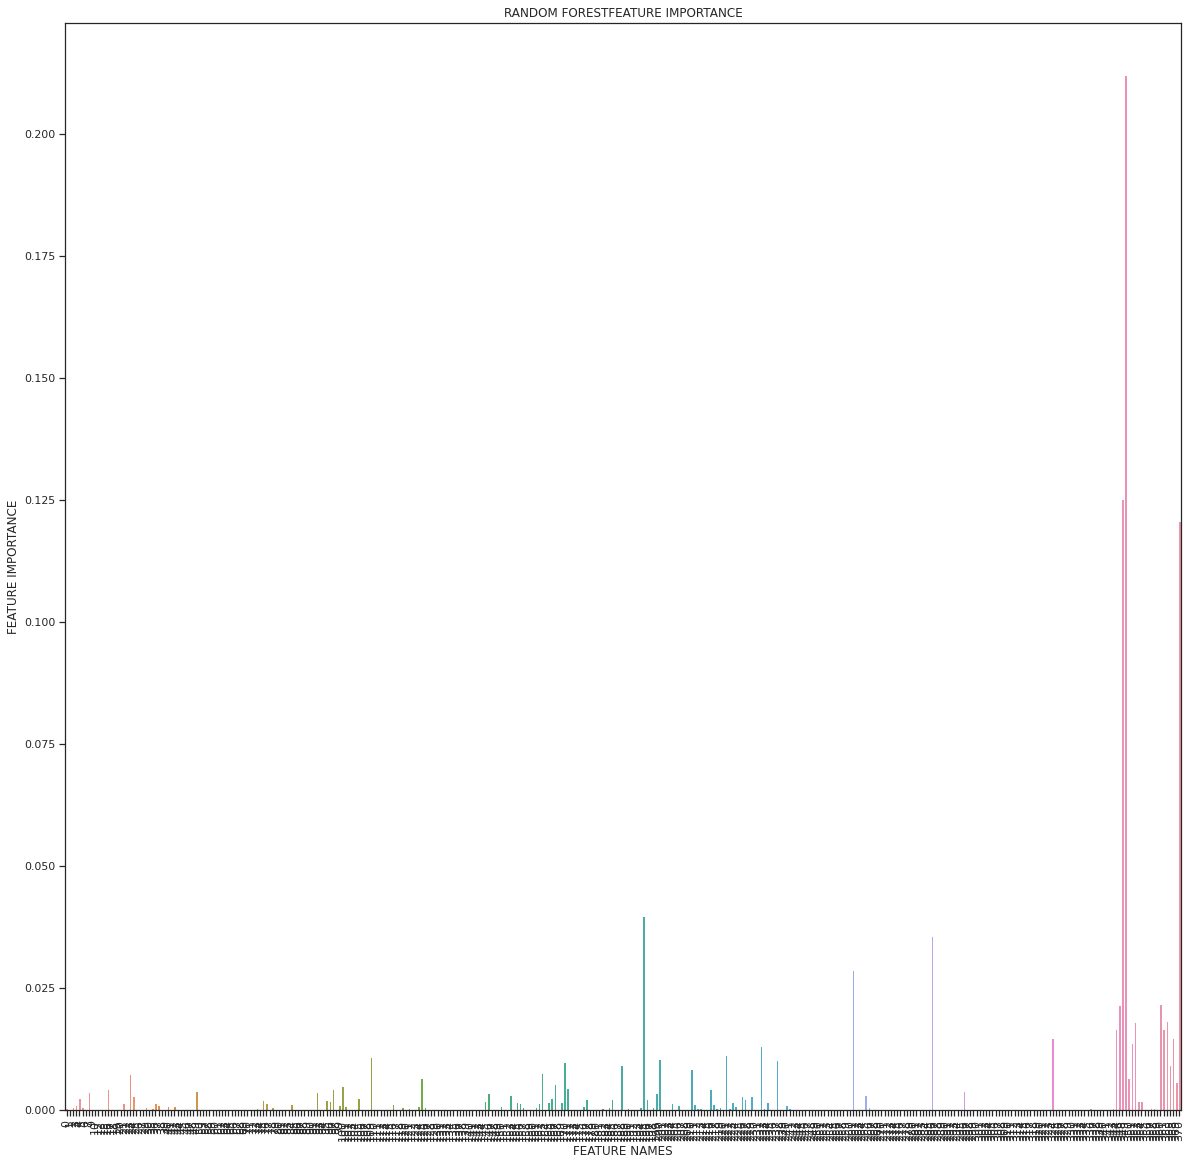

In [65]:
# hyperparameterTuning_RandomForest(x_train_bow,y_train_bow)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True,random_state=random_state)
rnd_clf.fit(x_train_bow, y_train_bow)
y_pred_bow_random = rnd_clf.predict(x_test_bow)
plot_feature_importance(rnd_clf.feature_importances_,x_train_bow.columns,'RANDOM FOREST')

In [66]:
featureScore(rnd_clf.feature_importances_)

Feature: 0, Score: 0.00038
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00074
Feature: 3, Score: 0.00103
Feature: 4, Score: 0.00244
Feature: 5, Score: 0.00063
Feature: 6, Score: 0.00024
Feature: 7, Score: 0.00366
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00020
Feature: 11, Score: 0.00021
Feature: 12, Score: 0.00026
Feature: 13, Score: 0.00427
Feature: 14, Score: 0.00034
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00004
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00146
Feature: 19, Score: 0.00022
Feature: 20, Score: 0.00743
Feature: 21, Score: 0.00301
Feature: 22, Score: 0.00015
Feature: 23, Score: 0.00034
Feature: 24, Score: 0.00022
Feature: 25, Score: 0.00058
Feature: 26, Score: 0.00022
Feature: 27, Score: 0.00039
Feature: 28, Score: 0.00156
Feature: 29, Score: 0.00102
Feature: 30, Score: 0.00013
Feature: 31, Score: 0.00009
Feature: 32, Score: 0.00092
Feature: 33, Score: 0.00017
Feature: 34, Score: 0.00083
Feature: 35, Score: 0.00000
Fe

In [67]:
rmse,R2,MAE,MSE,RMSLE,max_error_=metrics(y_test_bow,y_pred_bow_random)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

RMSE: 0.035206

R2 Score: 0.278838

MAE : 0.012470

MSE : 0.001239

RMSLE : -3.346550

max_error : 0.712372



## MLP 

In [68]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(x_train_bow, y_train_bow)
y_pred_bow_mlp = mlp_GS.predict(x_test_bow)

In [69]:
rmse,R2,MAE,MSE,RMSLE,max_error_=metrics(y_test_bow,y_pred_bow_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

RMSE: 0.032687

R2 Score: 0.378346

MAE : 0.012010

MSE : 0.001068

RMSLE : -3.420790

max_error : 0.668295



## SVC

In [70]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(x_train_bow, y_train_bow)
y_pred_bow_SVR = svr.predict(x_test_bow)

In [71]:
rmse,R2,MAE,MSE,RMSLE,max_error_=metrics(y_test_bow,y_pred_bow_SVR)

RMSE: 0.043741

R2 Score: -0.113218

MAE : 0.013949

MSE : 0.001913

RMSLE : -3.129477

max_error : 0.920044



In [72]:
dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [73]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,XGboost,0.029661,0.488104,0.008726,-3.517921,0.684508
1,Random Forest,0.035206,0.278838,0.012470,-3.346550,0.712372
2,MLP,0.032687,0.378346,0.012010,-3.420790,0.668295
3,SVR,0.043741,-0.113218,0.013949,-3.129477,0.920044
